# The Bernstein-Vazirani Algorithm
Suppose we have a black-box function $f$, which takes as input a string pf bits $(x)$, and returns either $0$ or $1$. However, now the function, instead of being constant of balanced, gives a bit-wise product of the input with some string $s$. That is,
$$
f(x)=x\cdot s\ (mod2)
$$
Now the problem is to find the string $s$.
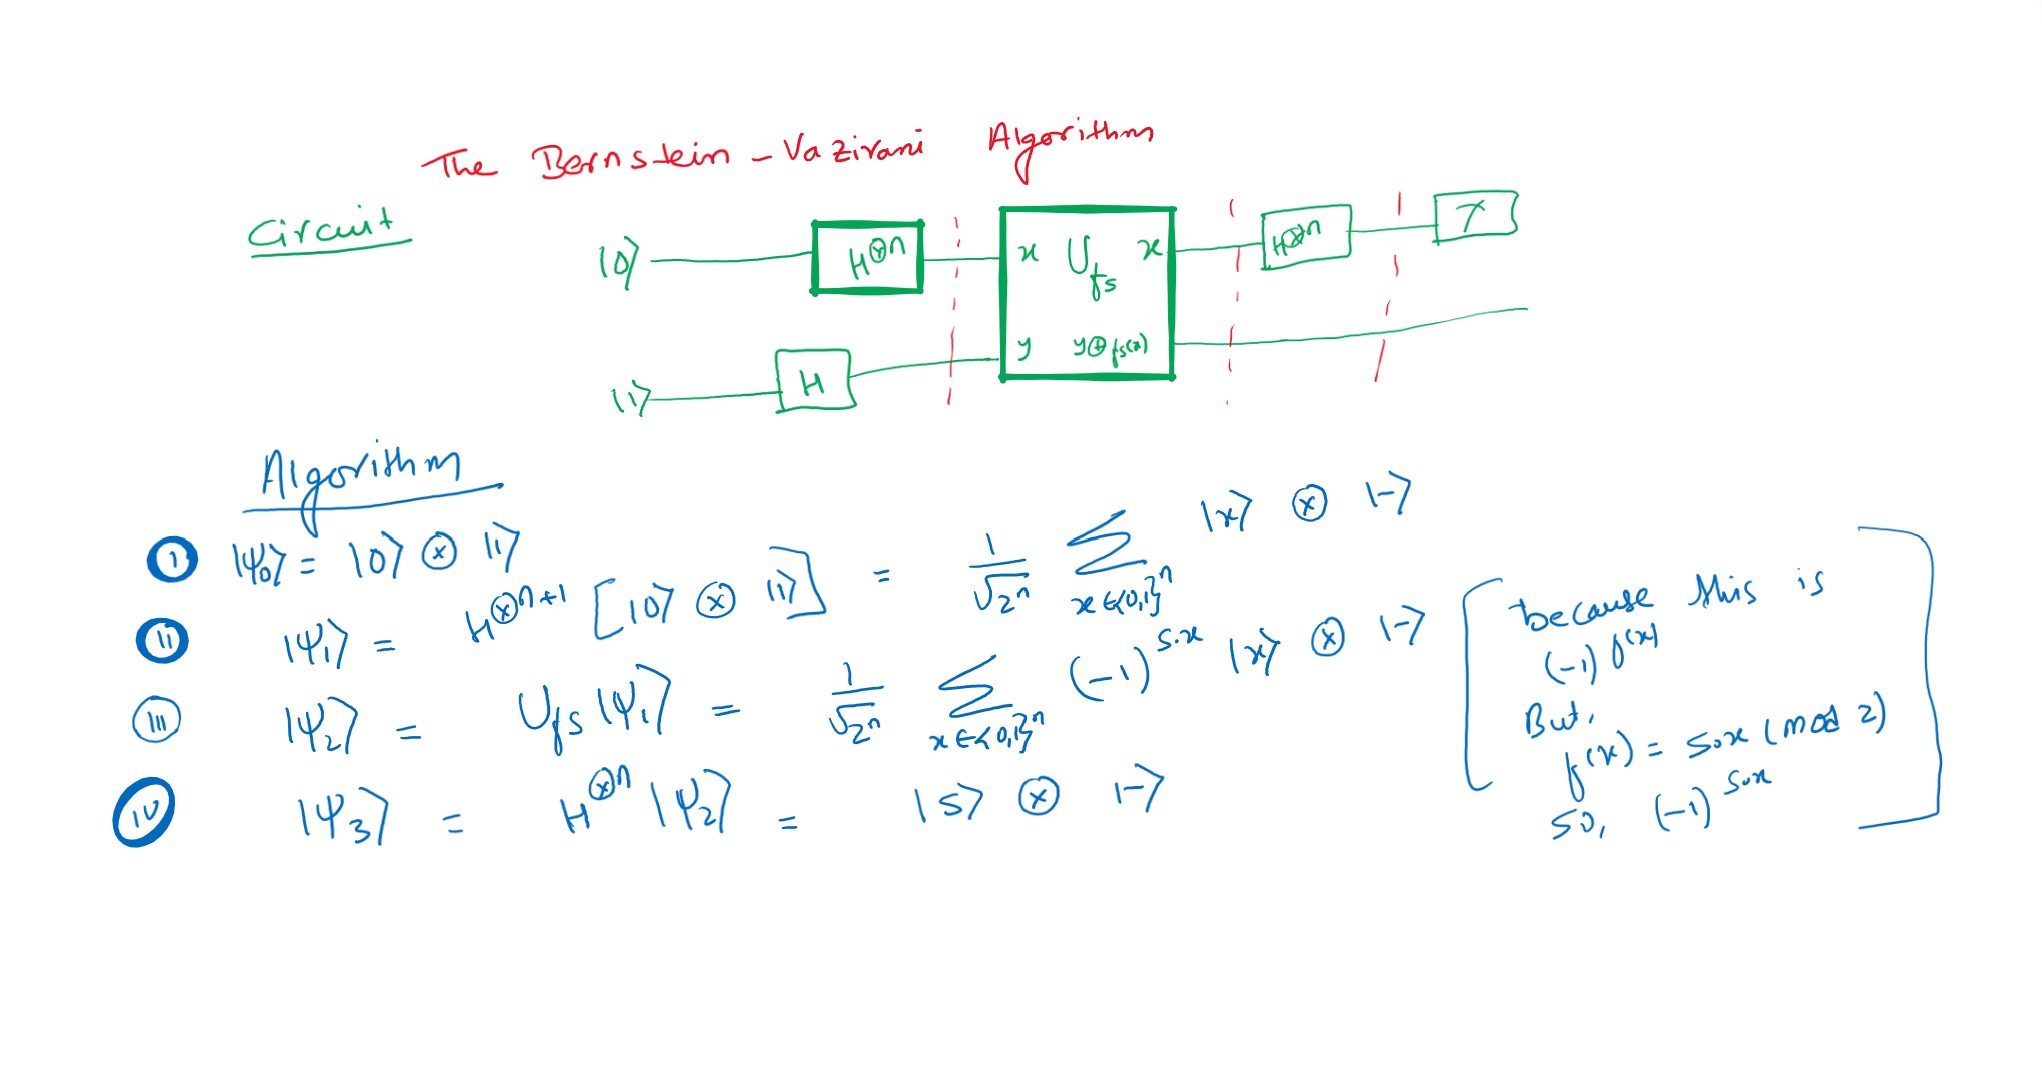

## Creating the Necessary Oracle

In [16]:
# Basic Imports
import matplotlib.pyplot as plt
import numpy as np

# Imports from Qiskit
from qiskit import IBMQ, BasicAer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy

# imports for plots
from qiskit.visualization import plot_histogram

In [2]:
def bv_oracle(s='000'):
    """This defines the oracle necessary for BV algorith where s is the secret string."""
    n = len(s)
    qc = QuantumCircuit(n+1)
    
    # reversing string for qiskit
    s = s[::-1]
    for q in range(n):
        if s[q] == '0':
            qc.i(q)
        else:
            qc.cx(q,n)
            
    # making a gate
    bv_oracle_gate = qc.to_gate()
    bv_oracle_gate.name = "Oracle"
    
    display(qc.draw('mpl'))
    
    return bv_oracle_gate, n
    
    

## The Bernstein-Vazirani Algorithm

In [8]:
def bv_algorithm(oracle,n):
    """This takes a BV type oracle and finds its secret string s."""
    qr = QuantumRegister(n+1,name='q')
    cr = ClassicalRegister(n, name = 'c')
    qc = QuantumCircuit(qr,cr)
    
    # Initiating
    for qubit in range(n+1):
        qc.h(qubit)
    qc.z(n)
    
    # Appending the Oracle
    qc.append(oracle,range(n+1))
    
    # Applying the Hadamard gates
    for qubit in range(n):
        qc.h(qubit)
        
    # Taking the measurement
    for i in range(n):
        qc.measure(i,i)
        
    display(qc.draw('mpl'))
    return qc

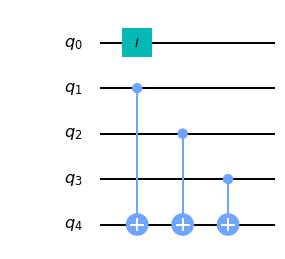

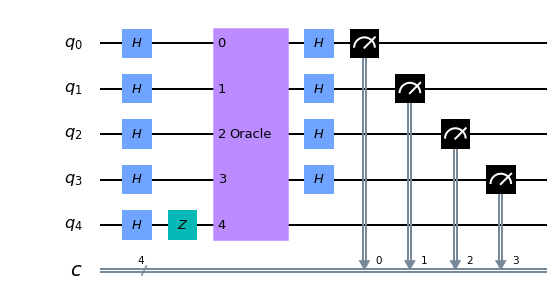

In [10]:
oracle , n = bv_oracle('1110')
bv_circuit = bv_algorithm(oracle,n)

## Checking Using Simulator

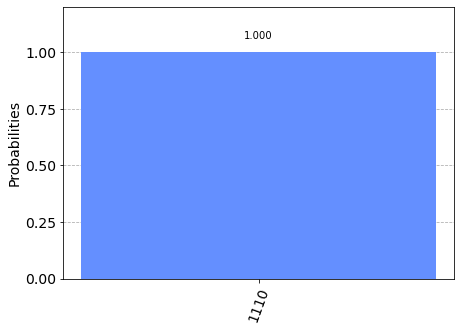

In [11]:
results = execute(bv_circuit,BasicAer.get_backend('qasm_simulator')).result()
counts = results.get_counts()
plot_histogram(counts)

## Checking Using Real Simulator

In [14]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
provider.backends()

ibmqfactory.load_account:WARNING:2020-09-25 21:42:49,629: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [19]:
backend = least_busy(provider.backends(filters = lambda x : x.configuration().n_qubits >= n+1 and
                                      not x.configuration().simulator and x.status().operational == True))
print("Least Busy Backend: ", backend)

Least Busy Backend:  ibmq_16_melbourne


In [20]:
from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(bv_circuit,backend=backend, shots = shots)
job_monitor(job)

Job Status: job has successfully run


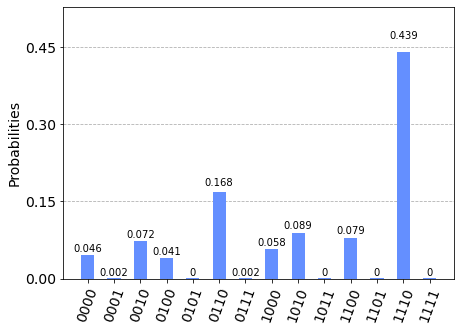

In [21]:
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

## Exercises

In [23]:
from qiskit_textbook.widgets import bv_widget
bv_widget(4,"1011")

HTMLMath(value='$$ |0000\\rangle = |0000\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01*\x00\x00\x01E\x08\x06\x00\x00\x00[\x98\xa0\xa0\x…